In [1]:
import os
import json
import pandas as pd
from pathlib import Path
import numpy as np

In [2]:
root_dir = Path('/scratch/ssd002/home/kelvin/projects/mcts_planner/tsp2/baselines/results')

In [3]:
evaluations = []
for model in os.listdir(root_dir):
    if model not in ["ppo", "a2c", "random"]:
        continue
    for env in os.listdir(root_dir / model):
        for run in os.listdir(root_dir / model / env):
            try:
                stats_json = next((root_dir / model / env / run).glob('*.stats.json'))
                evaluations.append([env, model, run, stats_json])
            except:
                pass

In [4]:
evaluations_df = pd.DataFrame(evaluations, columns=['env', 'model', 'run', 'stats_json'])
evaluations_df.head()

,env,model,run,stats_json
0,highway,a2c,2021-04-11--03-42-11,/scratch/ssd002/home/kelvin/projects/mcts_plan...
1,roundabout,a2c,2021-04-11--02-03-54,/scratch/ssd002/home/kelvin/projects/mcts_plan...
2,crossmerge,a2c,2021-04-13--23-57-05,/scratch/ssd002/home/kelvin/projects/mcts_plan...
3,crossmerge,ppo,2021-04-14--00-02-36,/scratch/ssd002/home/kelvin/projects/mcts_plan...
4,highway,ppo,2021-04-11--03-46-49,/scratch/ssd002/home/kelvin/projects/mcts_plan...


In [5]:
def get_stats(stats_json):
    with open(stats_json) as f:
        stats = json.load(f)
    return stats

In [6]:
evaluations_df['stats_dict'] = evaluations_df['stats_json'].apply(get_stats)

In [7]:
def mean_episode_length(stat_dict):
    return np.mean(stat_dict['episode_lengths'])

def std_episode_length(stat_dict):
    return np.std(stat_dict['episode_lengths'])

def mean_total_reward(stat_dict):
    return np.mean(stat_dict['episode_rewards'])

def std_total_reward(stat_dict):
    return np.std(stat_dict['episode_rewards'])

def mean_episode_velocity(stat_dict):
    return np.mean(list(map(np.mean, stat_dict['episode_speed'])))

def std_episode_velocity(stat_dict):
    return np.std(list(map(np.mean, stat_dict['episode_speed'])))

def episode_crashed(stat_dict):
    return np.mean(list(map(np.any, stat_dict['episode_crashed'])))

In [8]:
evaluations_df['mean_episode_length'] = evaluations_df['stats_dict'].apply(mean_episode_length)
evaluations_df['mean_episode_reward'] = evaluations_df['stats_dict'].apply(mean_total_reward)
evaluations_df['mean_episode_velocity'] = evaluations_df['stats_dict'].apply(mean_episode_velocity)
evaluations_df['mean_episode_crashed'] = evaluations_df['stats_dict'].apply(episode_crashed)

evaluations_df['std_episode_length'] = evaluations_df['stats_dict'].apply(std_episode_length)
evaluations_df['std_episode_reward'] = evaluations_df['stats_dict'].apply(std_total_reward)
evaluations_df['std_episode_velocity'] = evaluations_df['stats_dict'].apply(std_episode_velocity)

env
crossmerge    AxesSubplot(0.125,0.125;0.775x0.755)
highway       AxesSubplot(0.125,0.125;0.775x0.755)
roundabout    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

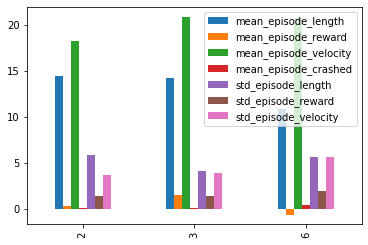

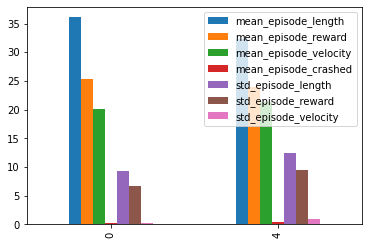

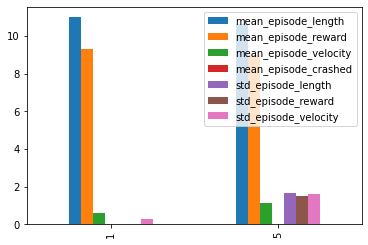

In [9]:
evaluations_df.groupby('env').plot.bar()

In [50]:
csv = evaluations_df.groupby('env').mean().to_csv()
with open("/h/kelvin/muzero_highway_env.csv", "w") as f:
    f.write(csv)

In [51]:
csv = evaluations_df.groupby('env').std().to_csv()
with open("/h/kelvin/muzero_highway_env_std.csv", "w") as f:
    f.write(csv)

In [14]:
evaluations_df.groupby('env').mean()

,mean_episode_length,mean_episode_reward
env,,
highway,34.23,24.581163
roundabout,10.83,9.160000


In [10]:
evaluations_df[["env", "model", "mean_episode_length", "mean_episode_reward", "mean_episode_velocity", "mean_episode_crashed", "std_episode_length", "std_episode_reward", "std_episode_velocity"]]

,env,model,mean_episode_length,mean_episode_reward,mean_episode_velocity,mean_episode_crashed,std_episode_length,std_episode_reward,std_episode_velocity
0,highway,a2c,36.08,25.259113,20.138283,0.24,9.299118,6.761590,0.321905
1,roundabout,a2c,11.00,9.299200,0.629898,0.00,0.000000,0.035991,0.294882
2,crossmerge,a2c,14.44,0.360000,18.270236,0.16,5.865697,1.466424,3.744135
3,crossmerge,ppo,14.22,1.520000,20.863105,0.10,4.090428,1.445545,3.930895
4,highway,ppo,32.38,23.903214,21.267977,0.42,12.446510,9.505046,1.006174
5,roundabout,ppo,10.66,9.020800,1.147126,0.04,1.668652,1.524818,1.596170
6,crossmerge,random,10.88,-0.600000,20.782885,0.40,5.612985,1.918333,5.678112


In [16]:
np.mean(list(map(np.max, evaluations_df[evaluations_df["env"] == "crossmerge"]['stats_dict'][3]["episode_num_goals_reached"])))

1.82

In [14]:
list(map(np.max, evaluations_df[evaluations_df["env"] == "crossmerge"]['stats_dict'][2]["episode_num_goals_reached"]))

[1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1]